# XGBoost를 이용한 부도예측

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import os

## 데이터 전처리 및 train, valid, test set 분리

In [33]:
def train_test_valid(file_name, valid=True):
    raw = pd.read_csv(f"{data_path}/{file_name}")
    
    # 데이터셋 분할
    from sklearn.model_selection import train_test_split
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(raw.iloc[:,:-1],raw.iloc[:,-1],
                                                       random_state = 1)
    
    if valid:
        X_train,X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.2,
                                                            random_state = 1)

        # 표준화
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test = scaler.transform(X_test)

        return X_train,X_valid,X_test,y_train,y_valid,y_test
    else:
         # 표준화
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        scaler = MinMaxScaler().fit(X_train_valid)
        X_train_valid = scaler.transform(X_train_valid)
        X_test = scaler.transform(X_test)
        
        return X_train_valid, X_test, y_train_valid, y_test

In [21]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score
def get_score(X_test, y_test, term,model):
    predicted = model.predict(X_test).round()
    accuracy = accuracy_score(y_test, predicted)
    precision = precision_score(y_test,predicted)
    recall = recall_score(y_test, predicted)
    confusion = confusion_matrix(y_test, predicted)
    roc = roc_auc_score(y_test, predicted)
    return accuracy, precision, recall, confusion, roc

## 년도별 accuracy, recall, precision, roc 비교

In [8]:
!pip install xgboost

In [11]:
import xgboost as xgb

In [34]:
models = []
result = {}
valid = True

# 파일명 읽어오기
data_path = os.path.join(".","final_data")
file_names = os.listdir(data_path)

# 하이퍼 파라미터 지정
learning_rate = 1e-4
max_epoch = 50

for idx, file_name in enumerate(file_names):
    # 해당 파일의 년도 추출
    term = int(file_name.split("y")[0])
    print(f"{term}년도 데이터 훈련시작")
    
    # 데이터 분할
    X_train,X_valid,X_test, y_train,y_valid,y_test = train_test_valid(file_name, valid=True)
    
    # 모델 구현
    models.append(xgb.XGBClassifier(silent=False, objective = "binary:logistic",gamma = 0.2,
                                   max_depth=8, random_state = 1))
    models[idx].fit(X_train,y_train, eval_set=[(X_valid,y_valid)],
             early_stopping_rounds=50,verbose=5)
    
    # 모델 평가
    a={i:j for i,j in zip(["accuracy", "precision", "recall", "confusion", "roc"],get_score(X_test,y_test,term,models[idx]))}
    result[f"{term}year"]=a

10년도 데이터 훈련시작
[11:21:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.09636
Will train until validation_0-error hasn't improved in 50 rounds.
[5]	validation_0-error:0.08318
[10]	validation_0-error:0.08273
[15]	validation_0-error:0.08136
[20]	validation_0-error:0.08000
[25]	validation_0-error:0.07955
[30]	validation_0-error:0.08136
[35]	validation_0-error:0.08045
[40]	validation_0-error:0.08045
[45]	validation_0-error:0.08045
[50]	validation_0-error:0.08045
[55]	validation_0-error:0.08136
[60]	validation_0-error:0.08227
[65]	validation_0-error:0.08182
[70]	validation_0-error:0.08182
[75]	validation_0-error:0.08182
[80]	validation_0-error:0.

Stopping. Best iteration:
[7]	validation_0-error:0.06061

18년도 데이터 훈련시작
[11:22:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.13333
Will train until validation_0-error hasn't improved in 50 rounds.
[5]	validation_0-error:0.11429
[10]	validation_0-error:0.11429
[15]	validation_0-error:0.11905
[20]	validation_0-error:0.10952
[25]	validation_0-error:0.10952
[30]	validation_0-error:0.10952
[35]	validation_0-error:0.10476
[40]	validation_0-error:0.10476
[45]	validation_0-error:0.10476
[50]	validation_0-error:0.10476
Stopping. Best iteration:
[1]	validation_0-error:0.10000

1년도 데이터 훈련시작
[11:22:26] WARNING: C:\Users\Administrator\workspace\xgbo

[0]	validation_0-error:0.09543
Will train until validation_0-error hasn't improved in 50 rounds.
[5]	validation_0-error:0.08962
[10]	validation_0-error:0.09035
[15]	validation_0-error:0.08890
[20]	validation_0-error:0.08926
[25]	validation_0-error:0.09107
[30]	validation_0-error:0.08962
[35]	validation_0-error:0.08890
[40]	validation_0-error:0.08817
[45]	validation_0-error:0.08636
[50]	validation_0-error:0.08563
[55]	validation_0-error:0.08491
[60]	validation_0-error:0.08491
[65]	validation_0-error:0.08527
[70]	validation_0-error:0.08599
[75]	validation_0-error:0.08745
[80]	validation_0-error:0.08708
[85]	validation_0-error:0.08672
[90]	validation_0-error:0.08599
[95]	validation_0-error:0.08745
[99]	validation_0-error:0.08672
9년도 데이터 훈련시작
[11:23:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to 

In [35]:
pd.DataFrame(result)

,10year,11year,12year,13year,14year,15year,16year,17year,18year,1year,2year,3year,4year,5year,6year,7year,8year,9year
accuracy,0.912711,0.902955,0.896863,0.907692,0.903394,0.915164,0.909258,0.909218,0.900285,0.900426,0.906813,0.90632,0.904097,0.901531,0.903052,0.90585,0.905508,0.912685
precision,0.716599,0.65587,0.609524,0.615385,0.603175,0.663158,0.6,0.610169,0.53125,0.624441,0.646953,0.637899,0.62605,0.604265,0.650108,0.646277,0.662983,0.655385
recall,0.41452,0.416452,0.385542,0.380952,0.36019,0.398734,0.348214,0.461538,0.459459,0.425381,0.411162,0.41769,0.396277,0.37172,0.443299,0.413265,0.434783,0.462039
confusion,"[[3169, 70], [250, 177]]","[[2741, 85], [227, 162]]","[[2359, 82], [204, 128]]","[[2028, 60], [156, 96]]","[[1654, 50], [135, 76]]","[[1307, 32], [95, 63]]","[[953, 26], [73, 39]]","[[615, 23], [42, 36]]","[[299, 15], [20, 17]]","[[6978, 252], [566, 419]]","[[6587, 197], [517, 361]]","[[6113, 193], [474, 340]]","[[5660, 178], [454, 298]]","[[5220, 167], [431, 255]]","[[4729, 162], [378, 301]]","[[4356, 133], [345, 243]]","[[3919, 122], [312, 240]]","[[3550, 112], [248, 213]]"
roc,0.696454,0.693187,0.675975,0.676108,0.665423,0.687418,0.660828,0.712744,0.705844,0.695263,0.691061,0.693542,0.682893,0.67036,0.705088,0.691819,0.702296,0.715727


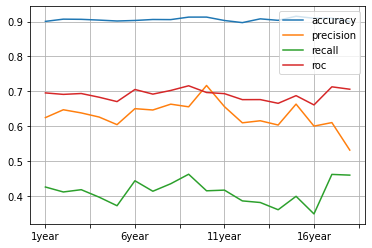

In [36]:
a=[f"{i}year" for i in range(1,19)]
result_df = pd.DataFrame(result)[a]

result_df.T.plot()
plt.grid()

- 9개년의 recall이 가장 좋음
- 전반적으로 precision, accuracy에 비해 recall이 낮음 -> 다수의 class인 0으로 예측하는 경향성
-> oversampling

## 10개년으로 부도위험 예측

In [70]:
best_term = 9 # 가장 성능이 좋은 term
X_train, X_test, y_train,y_test = train_test_valid(f"{best_term}year.csv",valid=False)

### 부도 위험이 높은 class 데이터 oversampling

In [71]:
X_train = np.concatenate([X_train,X_train[y_train==1]])
y_train = np.concatenate([y_train.values, np.ones((y_train==1).sum())])

### 모델 훈련

In [65]:
best_xgb = xgb.XGBClassifier(silent=False, objective = "binary:logistic",gamma = 0.2,
                                   max_depth=8, random_state = 1, n_estimators=1000)
best_xgb.fit(X_train,y_train, eval_set=[(X_test,y_test)],
             early_stopping_rounds=100,verbose=5)

[11:56:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.10478
Will train until validation_0-error hasn't improved in 100 rounds.
[5]	validation_0-error:0.10065
[10]	validation_0-error:0.09920
[15]	validation_0-error:0.09896
[20]	validation_0-error:0.09920
[25]	validation_0-error:0.09750
[30]	validation_0-error:0.09483
[35]	validation_0-error:0.09702
[40]	validation_0-error:0.09605
[45]	validation_0-error:0.09386
[50]	validation_0-error:0.09144
[55]	validation_0-error:0.09144
[60]	validation_0-error:0.09144
[65]	validation_0-error:0.08998
[70]	validation_0-error:0.08901
[75]	validation_0-error:0.09217
[80]	validation_0-error:0.09144
[85]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### 평가

In [75]:
accuracy, precision, recall, matrix, roc = get_score(X_test,y_test,best_term,best_xgb)
print("accuracy : {:.2}".format(accuracy))
print("precision : {:.2}".format(precision))
print("recall : {:.2}".format(recall))
print("roc : {:.2}".format(roc))
print("confusion-matrics")
print(matrix)

accuracy : 0.91
precision : 0.62
recall : 0.52
roc : 0.74
confusion-matrics
[[3516  146]
 [ 221  240]]
